In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
data = pd.read_excel("parmeters.xlsx")
data

,T,M,H
0,30,71,98
1,33,72,98
2,30,71,98
3,30,71,99
4,30,75,98
...,...,...,...
106742,24,17,8
106743,24,17,12
106744,24,17,12
106745,24,17,14


In [47]:
data['zone'] = ""
data.loc[data.H < 20, 'zone'] = 'arid'
data.loc[(data.H>=20) & (data.H<50), 'zone'] = 'semi arid'
data.loc[(data.H >=50) & (data.H<75), 'zone'] = 'sub humid'
data.loc[data.H >=75, 'zone'] = 'humid'

In [48]:
data.head(72125)

,T,M,H,zone
0,30,71,98,humid
1,33,72,98,humid
2,30,71,98,humid
3,30,71,99,humid
4,30,75,98,humid
...,...,...,...,...
72120,28,74,77,humid
72121,28,76,63,sub humid
72122,28,76,63,sub humid
72123,28,76,62,sub humid


In [49]:
data.loc[(data["T"]<25) & (data["zone"]=="humid") , "ETo"] = 3.5
data.loc[(data["T"]>=25) & (data["zone"]=="humid"), "ETo"] = 5.5

data.loc[(data["T"]<25) & (data["zone"]=="sub humid"), "ETo"] = 5.5
data.loc[(data["T"]>=25) & (data["zone"]=="sub humid"), "ETo"] = 7.5

data.loc[(data["T"]<25) & (data["zone"]=="semi arid"), "ETo"] = 6.5
data.loc[(data["T"]>=25) & (data["zone"]=="semi arid"), "ETo"] = 8.5

data.loc[(data["T"]<25) & (data["zone"]=="arid"), "ETo"] = 7.5
data.loc[(data["T"]>=25) & (data["zone"]=="arid"), "ETo"] = 9.5

In [50]:
data

,T,M,H,zone,ETo
0,30,71,98,humid,5.5
1,33,72,98,humid,5.5
2,30,71,98,humid,5.5
3,30,71,99,humid,5.5
4,30,75,98,humid,5.5
...,...,...,...,...,...
106742,24,17,8,arid,7.5
106743,24,17,12,arid,7.5
106744,24,17,12,arid,7.5
106745,24,17,14,arid,7.5


## Crop coefficient values for the crops considered:

crop coefficient (Kc) were 0.68, 0.96, 1.06 and 0.78 for initial, development, med. and late season, respectively

## Analysis of Cotton Crop

In [62]:
d_cotton = data
d_cotton["ETc1"] = d_cotton["ETo"]*0.68
d_cotton["ETc2"] = d_cotton["ETo"]*0.96
d_cotton["ETc3"] = d_cotton["ETo"]*1.06
d_cotton["ETc4"] = d_cotton["ETo"]*0.78

In [96]:
water_reqd = []
avg = d_cotton["M"].mean()
stagesize = int(d_cotton.shape[0]/4)
water_reqd = (d_cotton.iloc[0:stagesize]["ETc1"]-(abs(d_cotton[0:stagesize]["M"]-avg)/100))
# water_reqd = water_reqd+2
water_reqd = pd.concat([water_reqd,(d_cotton.iloc[stagesize:2*stagesize]["ETc2"]-(abs(d_cotton[stagesize:2*stagesize]["M"]-avg)/100))])
water_reqd = pd.concat([water_reqd,(d_cotton.iloc[2*stagesize:3*stagesize]["ETc3"]-(abs(d_cotton[2*stagesize:3*stagesize]["M"]-avg)/100))])
water_reqd = pd.concat([water_reqd,(d_cotton.iloc[3*stagesize:]["ETc4"]-(abs(d_cotton[3*stagesize:]["M"]-avg)/100))])

d_cotton["water_reqd"] = water_reqd
print(water_reqd)
d_cotton


0         3.673228
1         3.663228
2         3.673228
3         3.673228
4         3.633228
            ...   
106742    5.376772
106743    5.376772
106744    5.376772
106745    5.376772
106746    5.376772
Length: 106747, dtype: float64


,T,M,H,zone,ETo,ETc1,ETc2,ETc3,ETc4,water_reqd
0,30,71,98,humid,5.5,3.74,5.28,5.83,4.29,3.673228
1,33,72,98,humid,5.5,3.74,5.28,5.83,4.29,3.663228
2,30,71,98,humid,5.5,3.74,5.28,5.83,4.29,3.673228
3,30,71,99,humid,5.5,3.74,5.28,5.83,4.29,3.673228
4,30,75,98,humid,5.5,3.74,5.28,5.83,4.29,3.633228
...,...,...,...,...,...,...,...,...,...,...
106742,24,17,8,arid,7.5,5.10,7.20,7.95,5.85,5.376772
106743,24,17,12,arid,7.5,5.10,7.20,7.95,5.85,5.376772
106744,24,17,12,arid,7.5,5.10,7.20,7.95,5.85,5.376772
106745,24,17,14,arid,7.5,5.10,7.20,7.95,5.85,5.376772


In [95]:
d_cotton.shape

(106747, 10)

In [92]:
d_cotton

,T,M,H,zone,ETo,ETc1,ETc2,ETc3,ETc4,water_reqd
0,30,71,98,humid,5.5,3.74,5.28,5.83,4.29,None
1,33,72,98,humid,5.5,3.74,5.28,5.83,4.29,None
2,30,71,98,humid,5.5,3.74,5.28,5.83,4.29,None
3,30,71,99,humid,5.5,3.74,5.28,5.83,4.29,None
4,30,75,98,humid,5.5,3.74,5.28,5.83,4.29,None
...,...,...,...,...,...,...,...,...,...,...
106742,24,17,8,arid,7.5,5.10,7.20,7.95,5.85,None
106743,24,17,12,arid,7.5,5.10,7.20,7.95,5.85,None
106744,24,17,12,arid,7.5,5.10,7.20,7.95,5.85,None
106745,24,17,14,arid,7.5,5.10,7.20,7.95,5.85,None


In [9]:
avg = d_cotton["M"].mean()
d_cotton["water-initial"] = d_cotton["ETc1"]-(abs(d_cotton["M"]-avg)/100)
d_cotton["water-development"] = d_cotton["ETc2"] - (abs(d_cotton["M"]-avg)/100)
d_cotton["water-midseason"] = d_cotton["ETc3"] - (abs(d_cotton["M"]-avg)/100)
d_cotton["water-harvest"] = d_cotton["ETc4"] - (abs(d_cotton["M"]-avg)/100)

In [43]:
stagesize = 2
# for i in range(0,stagesize):
#     d_cotton.iloc[0:stagesize]["water-reqd"]=d_cotton["water-initial"]
d_cotton.iloc[0:stagesize]["water-requd"] = d_cotton.iloc[0:stagesize]["water-initial"] 
d_cotton.iloc[stagesize:2*stagesize]["water-requd"] = d_cotton.iloc[stagesize:2*stagesize]["water-development"] 


C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [44]:
d_cotton

,T,M,H,zone,ETo,ETc1,ETc2,ETc3,ETc4,water-initial,water-development,water-midseason,water-harvest,water-reqd
0,30,71,98,humid,5.5,3.74,5.28,5.83,4.29,3.673228,5.213228,5.763228,4.223228,3.673228
1,33,72,98,humid,5.5,3.74,5.28,5.83,4.29,3.663228,5.203228,5.753228,4.213228,3.663228
2,30,71,98,humid,5.5,3.74,5.28,5.83,4.29,3.673228,5.213228,5.763228,4.223228,3.673228
3,30,71,99,humid,5.5,3.74,5.28,5.83,4.29,3.673228,5.213228,5.763228,4.223228,3.673228
4,30,75,98,humid,5.5,3.74,5.28,5.83,4.29,3.633228,5.173228,5.723228,4.183228,3.633228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106742,24,17,8,arid,7.5,5.10,7.20,7.95,5.85,4.626772,6.726772,7.476772,5.376772,4.626772
106743,24,17,12,arid,7.5,5.10,7.20,7.95,5.85,4.626772,6.726772,7.476772,5.376772,4.626772
106744,24,17,12,arid,7.5,5.10,7.20,7.95,5.85,4.626772,6.726772,7.476772,5.376772,4.626772
106745,24,17,14,arid,7.5,5.10,7.20,7.95,5.85,4.626772,6.726772,7.476772,5.376772,4.626772


<BarContainer object of 4 artists>

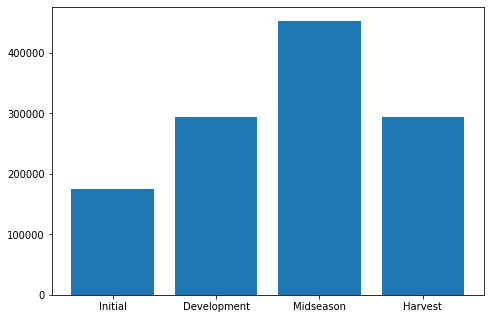

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_cotton["water-initial"].sum(),d_cotton["water-development"].sum(),d_cotton["water-midseason"].sum(), d_cotton["water-harvest"].sum()]
ax.bar(season,amt)

## Analysis of Millet Crop

In [12]:
d_millet = data[data["zone"]=="arid"]
d_millet["ETc1"] = d_millet["ETo"]*0.35
d_millet["ETc2"] = d_millet["ETo"]*0.75
d_millet["ETc3"] = d_millet["ETo"]*1.10
d_millet["ETc4"] = d_millet["ETo"]*0.65

C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [13]:
avg = d_millet["M"].mean()
d_millet["water-initial"] = d_millet["ETc1"]-(abs(d_millet["M"]-avg)/100)
d_millet["water-development"] = d_millet["ETc2"] - (abs(d_millet["M"]-avg)/100)
d_millet["water-midseason"] = d_millet["ETc3"] - (abs(d_millet["M"]-avg)/100)
d_millet["water-harvest"] = d_millet["ETc4"] - (abs(d_millet["M"]-avg)/100)

C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [14]:
d_millet

,T,M,H,zone,ETo,ETc1,ETc2,ETc3,ETc4,water-initial,water-development,water-midseason,water-harvest
414,30,75,4,arid,9.5,3.325,7.125,10.45,6.175,2.87891,6.67891,10.00391,5.72891
415,30,77,4,arid,9.5,3.325,7.125,10.45,6.175,2.85891,6.65891,9.98391,5.70891
416,30,75,12,arid,9.5,3.325,7.125,10.45,6.175,2.87891,6.67891,10.00391,5.72891
417,31,73,4,arid,9.5,3.325,7.125,10.45,6.175,2.89891,6.69891,10.02391,5.74891
418,30,78,12,arid,9.5,3.325,7.125,10.45,6.175,2.84891,6.64891,9.97391,5.69891
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106742,24,17,8,arid,7.5,2.625,5.625,8.25,4.875,2.49109,5.49109,8.11609,4.74109
106743,24,17,12,arid,7.5,2.625,5.625,8.25,4.875,2.49109,5.49109,8.11609,4.74109
106744,24,17,12,arid,7.5,2.625,5.625,8.25,4.875,2.49109,5.49109,8.11609,4.74109
106745,24,17,14,arid,7.5,2.625,5.625,8.25,4.875,2.49109,5.49109,8.11609,4.74109


<BarContainer object of 4 artists>

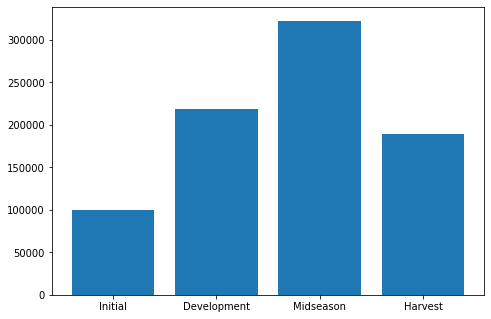

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_millet["water-initial"].sum(),d_millet["water-development"].sum(),d_millet["water-midseason"].sum(), d_millet["water-harvest"].sum()]
ax.bar(season,amt)

## Analysis of Maize crop

In [16]:
d_maize = data[data["zone"]=="arid"]
d_maize["ETc1"] = d_maize["ETo"]*0.40
d_maize["ETc2"] = d_maize["ETo"]*0.75
d_maize["ETc3"] = d_maize["ETo"]*1.15
d_maize["ETc4"] = d_maize["ETo"]*0.70

C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [17]:
avg = d_maize["M"].mean()
d_maize["water-initial"] = d_maize["ETc1"]-(abs(d_maize["M"]-avg)/100)
d_maize["water-development"] = d_maize["ETc2"] - (abs(d_maize["M"]-avg)/100)
d_maize["water-midseason"] = d_maize["ETc3"] - (abs(d_maize["M"]-avg)/100)
d_maize["water-harvest"] = d_maize["ETc4"] - (abs(d_maize["M"]-avg)/100)

C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [18]:
d_maize

,T,M,H,zone,ETo,ETc1,ETc2,ETc3,ETc4,water-initial,water-development,water-midseason,water-harvest
414,30,75,4,arid,9.5,3.8,7.125,10.925,6.65,3.35391,6.67891,10.47891,6.20391
415,30,77,4,arid,9.5,3.8,7.125,10.925,6.65,3.33391,6.65891,10.45891,6.18391
416,30,75,12,arid,9.5,3.8,7.125,10.925,6.65,3.35391,6.67891,10.47891,6.20391
417,31,73,4,arid,9.5,3.8,7.125,10.925,6.65,3.37391,6.69891,10.49891,6.22391
418,30,78,12,arid,9.5,3.8,7.125,10.925,6.65,3.32391,6.64891,10.44891,6.17391
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106742,24,17,8,arid,7.5,3.0,5.625,8.625,5.25,2.86609,5.49109,8.49109,5.11609
106743,24,17,12,arid,7.5,3.0,5.625,8.625,5.25,2.86609,5.49109,8.49109,5.11609
106744,24,17,12,arid,7.5,3.0,5.625,8.625,5.25,2.86609,5.49109,8.49109,5.11609
106745,24,17,14,arid,7.5,3.0,5.625,8.625,5.25,2.86609,5.49109,8.49109,5.11609


<BarContainer object of 4 artists>

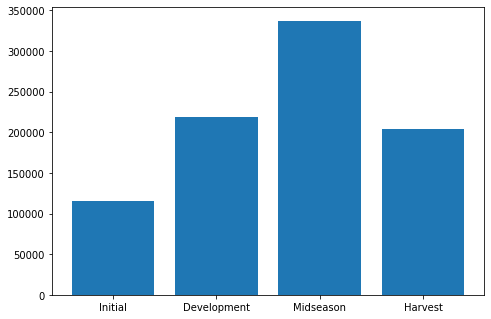

In [19]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_maize["water-initial"].sum(),d_maize["water-development"].sum(),d_maize["water-midseason"].sum(), d_maize["water-harvest"].sum()]
ax.bar(season,amt)

# Analysis of sugarcane crop

In [20]:
d_sc = data[data["zone"]=="humid"]
d_sc["ETc1"] = d_sc["ETo"]*0.45
d_sc["ETc2"] = d_sc["ETo"]*0.85
d_sc["ETc3"] = d_sc["ETo"]*1.15
d_sc["ETc4"] = d_sc["ETo"]*0.65


avg = d_sc["M"].mean()
d_sc["water-initial"] = d_sc["ETc1"]-(abs(d_sc["M"]-avg)/100)
d_sc["water-development"] = d_sc["ETc2"] - (abs(d_sc["M"]-avg)/100)
d_sc["water-midseason"] = d_sc["ETc3"] - (abs(d_sc["M"]-avg)/100)
d_sc["water-harvest"] = d_sc["ETc4"] - (abs(d_sc["M"]-avg)/100)

C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

<BarContainer object of 4 artists>

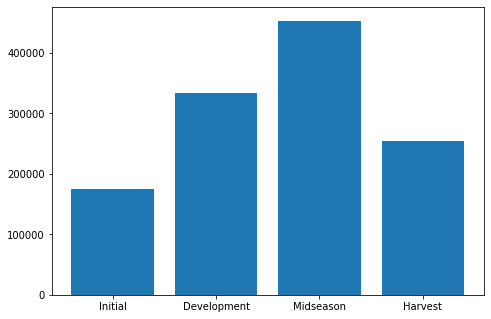

In [21]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_sc["water-initial"].sum(),d_sc["water-development"].sum(),d_sc["water-midseason"].sum(), d_sc["water-harvest"].sum()]
ax.bar(season,amt)

# Comparison of irrigation requirement of all the above crops

In [22]:
total_cotton=d_cotton["water-initial"].sum()+d_cotton["water-development"].sum()+d_cotton["water-midseason"].sum()+ d_cotton["water-harvest"].sum()
total_maize=d_maize["water-initial"].sum()+d_maize["water-development"].sum()+d_maize["water-midseason"].sum()+ d_maize["water-harvest"].sum()
total_millet=d_millet["water-initial"].sum()+d_millet["water-development"].sum()+d_millet["water-midseason"].sum()+ d_millet["water-harvest"].sum()
total_sc=d_sc["water-initial"].sum()+d_sc["water-development"].sum()+d_sc["water-midseason"].sum()+ d_sc["water-harvest"].sum()

875081.5544217601 830563.8044217601 1218084.7981785953 1218084.7981785953


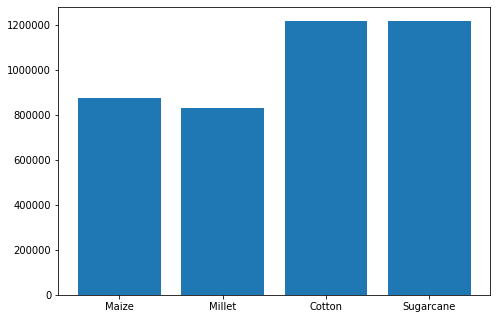

In [23]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
crop = ['Maize', 'Millet','Cotton','Sugarcane']
amt = [total_maize,total_millet,total_cotton,total_sc]
ax.bar(crop,amt)
print(total_maize,total_millet,total_cotton,total_sc)

# Repeating data

In [8]:
data_new = data.copy()

In [13]:
frames = [data_new,data_new,data_new,data_new,data_new]
newdat = pd.concat(frames)

In [14]:
newdat['zone'] = ""
newdat.loc[newdat.H < 20, 'zone'] = 'arid'
newdat.loc[(newdat.H>=20) & (newdat.H<50), 'zone'] = 'semi arid'
newdat.loc[(newdat.H >=50) & (newdat.H<75), 'zone'] = 'sub humid'
newdat.loc[newdat.H >=75, 'zone'] = 'humid'

In [15]:
newdat.loc[(newdat["T"]<25) & (newdat["zone"]=="humid") , "ETo"] = 3.5
newdat.loc[(newdat["T"]>=25) & (newdat["zone"]=="humid"), "ETo"] = 5.5

newdat.loc[(newdat["T"]<25) & (newdat["zone"]=="sub humid"), "ETo"] = 5.5
newdat.loc[(newdat["T"]>=25) & (newdat["zone"]=="sub humid"), "ETo"] = 7.5

newdat.loc[(newdat["T"]<25) & (newdat["zone"]=="semi arid"), "ETo"] = 6.5
newdat.loc[(newdat["T"]>=25) & (newdat["zone"]=="semi arid"), "ETo"] = 8.5

newdat.loc[(newdat["T"]<25) & (newdat["zone"]=="arid"), "ETo"] = 7.5
newdat.loc[(newdat["T"]>=25) & (newdat["zone"]=="arid"), "ETo"] = 9.5

C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

<BarContainer object of 4 artists>

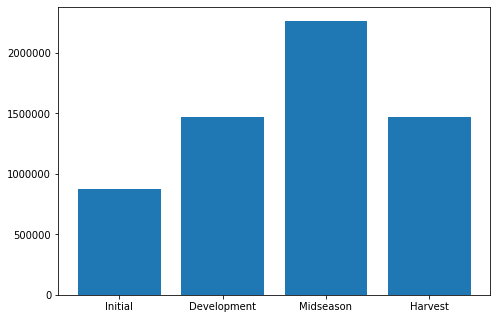

In [16]:
d_cotton = newdat[newdat["zone"]=="humid"]
d_cotton["ETc1"] = d_cotton["ETo"]*0.45
d_cotton["ETc2"] = d_cotton["ETo"]*0.75
d_cotton["ETc3"] = d_cotton["ETo"]*1.15
d_cotton["ETc4"] = d_cotton["ETo"]*0.75

avg = d_cotton["M"].mean()
d_cotton["water-initial"] = d_cotton["ETc1"]-(abs(d_cotton["M"]-avg)/100)
d_cotton["water-development"] = d_cotton["ETc2"] - (abs(d_cotton["M"]-avg)/100)
d_cotton["water-midseason"] = d_cotton["ETc3"] - (abs(d_cotton["M"]-avg)/100)
d_cotton["water-harvest"] = d_cotton["ETc4"] - (abs(d_cotton["M"]-avg)/100)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_cotton["water-initial"].sum(),d_cotton["water-development"].sum(),d_cotton["water-midseason"].sum(), d_cotton["water-harvest"].sum()]
ax.bar(season,amt)